# Load and Explore the Iris Dataset

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Import the warnings library
import warnings

# Filter and hide all warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display the first 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Check data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


🔍 **Initial Observations from Dataset Info**

✅ 150 entries: The dataset includes 150 flower samples, consistent with the Iris dataset.

✅ No missing values: All columns (features and species label) have 150 non-null entries, meaning the dataset is clean and ready for analysis without preprocessing.

In [5]:
# Check for missing values in every column
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

## Basic Data Analytics

In [7]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [12]:
# Clean column names by stripping leading and trailing spaces
df.columns = df.columns.str.strip()

# Grouping: average measurements per species
df.groupby('species').mean().T

species,setosa,versicolor,virginica
sepal length (cm),5.006,5.936,6.588
sepal width (cm),3.428,2.770,2.974
petal length (cm),1.462,4.260,5.552
petal width (cm),0.246,1.326,2.026


## Initial observations from dataset info
- **150 entries**: The dataset contains 150 flower samples.  
- **No missing values**: All five columns have 150 non-null entries.  
- **Data types**  
  - Four features (`sepal length (cm)`, `sepal width (cm)`, `petal length (cm)`, `petal width (cm)`) are `float64`.  
  - The `species` column is `category`.  

## Observations from summary statistics
- **Uniform sample size**  
  - All features have 150 observations (no dropped rows).  
  
- **Mean values**  
  - Sepal length: 5.84 cm  
  - Sepal width: 3.06 cm  
  - Petal length: 3.76 cm  
  - Petal width: 1.20 cm  
  
- **Variability (standard deviation)**  
  - Petal length (1.77 cm) and petal width (0.76 cm) vary more than sepal length (0.83 cm) and sepal width (0.44 cm).  
  - *Implication*: Petal measurements may better discriminate between species.  

- **Range (max – min)**  
  - Sepal length: 4.3 → 7.9 cm (~ 3.6 cm)  
  - Sepal width: 2.0 → 4.4 cm (~ 2.4 cm)  
  - Petal length: 1.0 → 6.9 cm (~ 5.9 cm)  
  - Petal width: 0.1 → 2.5 cm (~ 2.4 cm)  
  - *Note*: Petal length shows the widest span. 

- **Interquartile ranges (IQR)**  
  - Sepal length IQR: 5.1 → 6.4 cm (1.3 cm)  
  - Petal width IQR: 0.3 → 1.8 cm (1.5 cm)  
  - *Observation*: Petal width distribution is more skewed toward lower values.


In [15]:
#  Check if one species has significantly longer petals
df.groupby('species')['petal length (cm)'].mean()

species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal length (cm), dtype: float64

**Insights**
  - Setosa has notably shorter petals compared to the other two species.  
  - Virginica shows the longest petals (≈ 5.55 cm), suggesting petal length is a strong feature for distinguishing species.  
  - The increase from versicolor (4.26 cm) to virginica (5.55 cm) is substantial (≈ 1.29 cm difference), reinforcing its discriminative power.

## Data Visualization

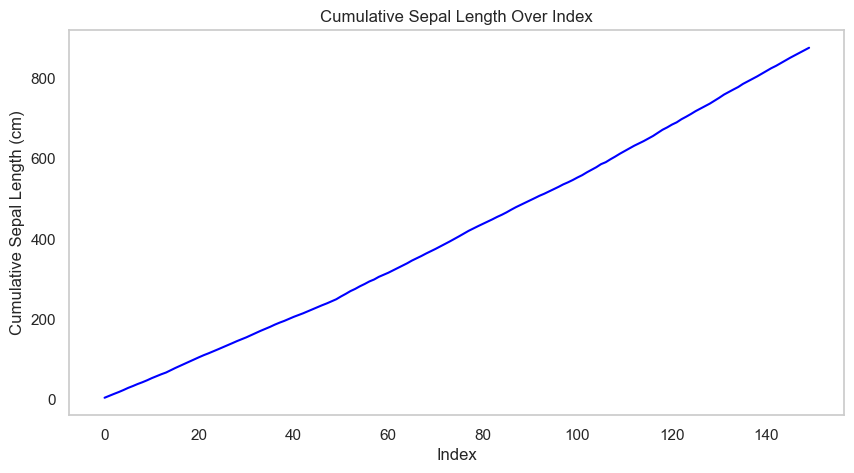

In [27]:
# Simulate a trend: cumulative sepal length just for demo
df['cumulative_sepal_length'] = df['sepal length (cm)'].cumsum()

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['cumulative_sepal_length'], color='blue')
plt.title('Cumulative Sepal Length Over Index')
plt.xlabel('Index')
plt.ylabel('Cumulative Sepal Length (cm)')
plt.grid(False) # Disable grid lines
plt.show();

* Trend: The line chart shows a steady increase in cumulative sepal length (cm) over the index.
* X-axis (Index): Represents data points (likely samples, e.g., flowers).
* Y-axis: Cumulative sepal length, reaching just over 800 cm by index 150.
* Observation: The consistent upward slope indicates uniform, positive sepal lengths across the dataset.

### Bar Chart (average petal length per species)

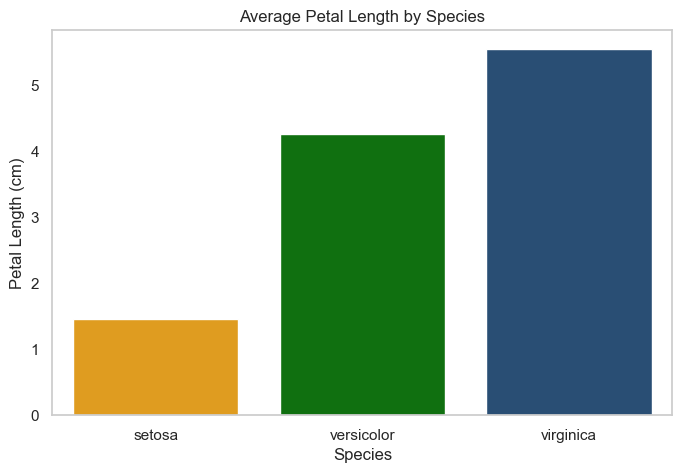

In [ ]:
# Define a custom color palette
custom_palette = ['#FFA500', '#008000', '#1C4E80']  # Orange, Green, Blue

# Group data and create the bar plot
species_avg = df.groupby('species')['petal length (cm)'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=species_avg, 
            x='species', 
            y='petal length (cm)', 
            palette=custom_palette)
plt.title('Average Petal Length by Species')
plt.ylabel('Petal Length (cm)')
plt.xlabel('Species')
plt.grid(False) # Disable grid lines
plt.show();

- `Setosa:` Shortest average petal length (~1.5 cm), distinct from others.
- `Versicolor:` Moderate average petal length (~4.3 cm), in the middle range.
- `Virginica:` Longest average petal length (~5.5 cm), a clear distinguishing feature.
- `Observation:` Petal length increases significantly across species, making it a strong discriminative feature.

## Histogram (distribution of sepal width)

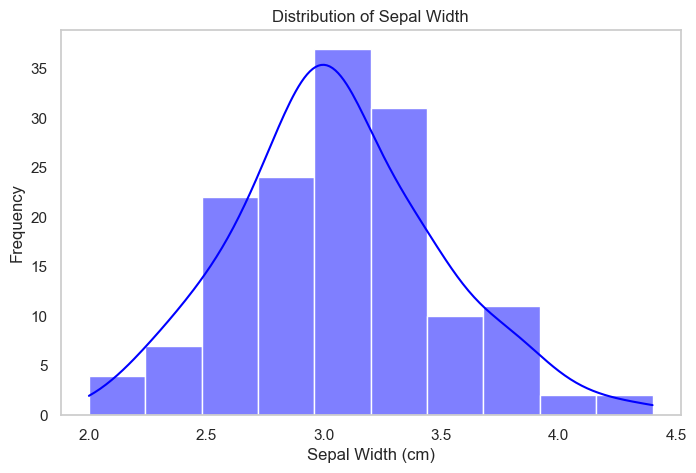

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['sepal width (cm)'], 
             bins=10, 
             kde=True, 
             color='blue')
plt.title('Distribution of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.grid(False)  # Disable grid lines
plt.show()

- `Distribution:` Sepal width (cm) follows a roughly normal distribution, peaking around 3.0 cm.
- `Range:` Most sepal widths are between 2.0 cm and 4.5 cm.
- `Frequency:` Highest frequency (~35) occurs near 3.0 cm, indicating this is the most common sepal width.
- `Observation:` The distribution is slightly skewed, with a longer tail on the right (wider sepal widths).

## Scatter Plot (sepal length vs. petal length by species)

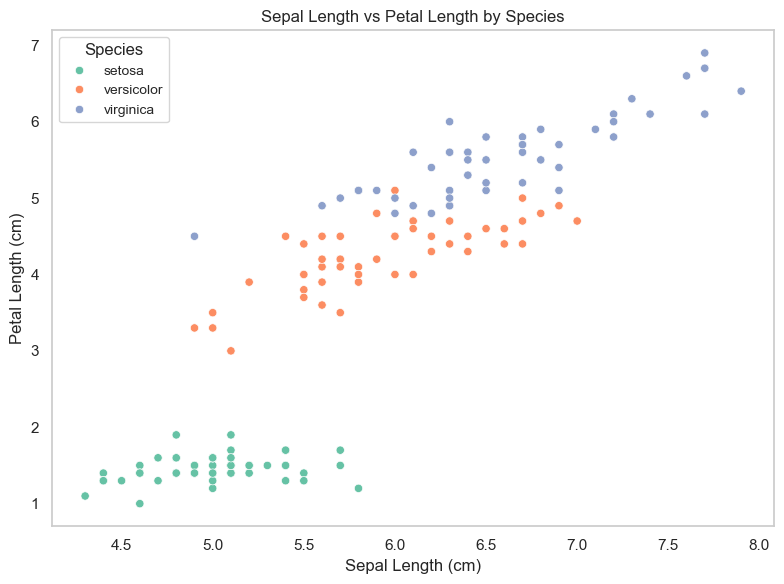

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species', palette='Set2')
plt.title('Sepal Length vs Petal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.grid(False)  # Disable grid lines
plt.legend(title='Species', title_fontsize=12, fontsize=10, loc='upper left')
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

- `Setosa`: Clusters with short petal lengths (~1-2 cm) and sepal lengths (~4.5-5.5 cm), distinct from others.  
- `Versicolor`: Mid-range petal lengths (~3-5 cm) and sepal lengths (~5-7 cm), some overlap with Virginica.  
- `Virginica`: Longest petal lengths (~4.5-7 cm) and sepal lengths (~6-8 cm), mostly separate from others.  
- `Observation`: Clear separation by species, with petal length and sepal length as strong distinguishing features.

# Observations / Findings

- `Dataset Overview`: 150 flower samples, evenly divided among three species (`setosa`, `versicolor`, `virginica`) with 50 samples each, no missing values, four numeric features (`float64`), and one `category` (`species`).  
- `Petal Length as a Key Feature`:  
  - `Setosa`: Notably shorter petals compared to `Versicolor` and `Virginica`.  
  - `Virginica`: Longest petals (≈ 5.55 cm), a strong distinguishing feature.  
  - `Versicolor to Virginica`: Petal length increases from 4.26 cm to 5.55 cm (≈ 1.29 cm difference), reinforcing its discriminative power.  
  - Widest range (1.0 → 6.9 cm, ~5.9 cm) and highest variability (std: 1.77 cm), ideal for species differentiation.  
  - Clear linear relationship with sepal length, especially for `Versicolor` and `Virginica`, enhancing species separation.  
- `Petal Width`: High variability (std: 0.76 cm) and skewed distribution (IQR: 0.3 → 1.8 cm), supporting its use in species classification.  
- `Sepal Measurements`:  
  - `Setosa`: Generally shorter sepals compared to others.  
  - Less variability (sepal length std: 0.83 cm, sepal width std: 0.44 cm), less effective for distinguishing species.  
  - Sepal width distribution is roughly normal, peaking around 3.0 cm, with some variation across species.